In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
# import searborn as sr

## 1. Effect of Sampling
We will use OpenCV function "resize" for both downsampling and upsampling

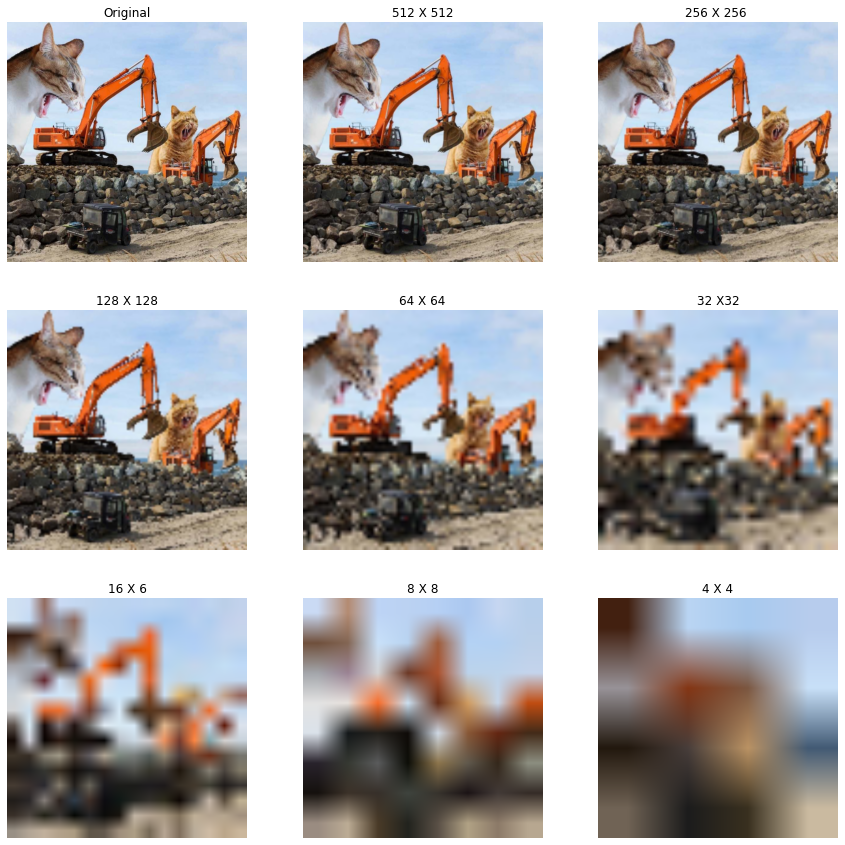

In [7]:
img_path = "/home/kashraf/Downloads/cat_2.jpg"
def img_resize(img,output_shape= (1024,1024)):
    # Resize image to the desired size (down sampling)
    resized = cv2.resize(img, output_shape)
    # Return a 1024 X1024 image (Up sampling)
    return cv2.resize(resized,(1024,1024))
#     return resized
                     
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (1024,1024))
img1 = img_resize(img,(512,512))
img2 = img_resize(img,(256,256))
img3 = img_resize(img,(128,128))
img4 = img_resize(img,(64,64))
img5 = img_resize(img,(32,32))
img6 = img_resize(img,(16,16))
img7 = img_resize(img,(8,8))
img8 = img_resize(img,(4,4))
                     
images = [img,img1,img2,img3,img4,img5,img6,img7,img8]
titles = ["Original","512 X 512",'256 X 256 ','128 X 128',"64 X 64","32 X32",'16 X 6',"8 X 8","4 X 4"]

fig, axes = plt.subplots(ncols=3,nrows=3, figsize=(15,15))
for ax, title, im in zip(axes.flatten(),titles,images):
    ax.imshow(im)
    ax.set_title(title)
    ax.axis("off")
plt.savefig("Sampling.png")



## 2. Effect of quantization (Shift right operation)
This is pretty simple. We can use bits right shift operator in python which shifts the bit N times to the right replacing MSB values with zeros.

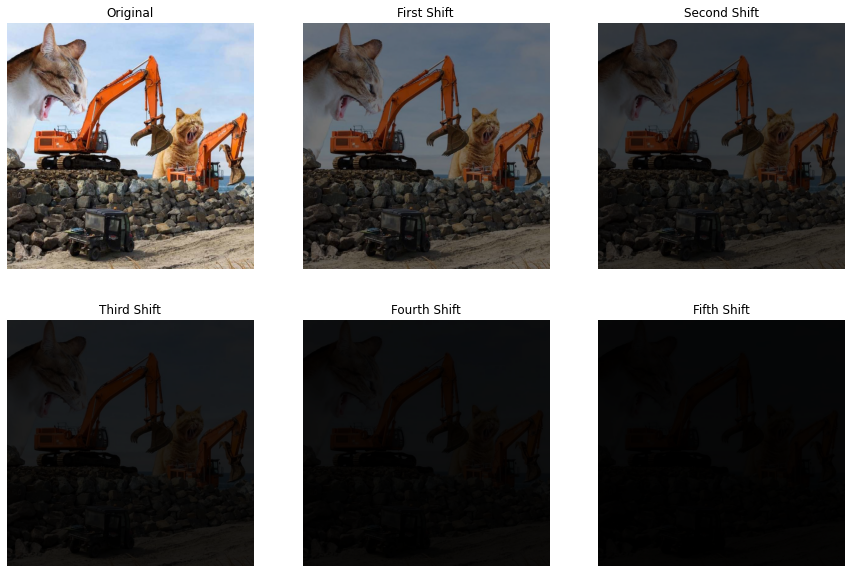

In [8]:
img1 = img>>1
img2 = img>>2
img3 = img>>3
img4 = img>>4
img5 = img>>5
images = [img,img1,img2,img3,img4,img5]
titles = ["Original","First Shift",'Second Shift','Third Shift',"Fourth Shift","Fifth Shift"]
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
for ax, title, im in zip(axes.flatten(),titles,images):
    ax.imshow(im)
    ax.set_title(title)
    ax.axis("off")
plt.savefig("Quantization.png")

In [4]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 2* log10(max_pixel / sqrt(mse))
    return psnr